## Шаг 2: Парсинг FAQ и информации о курсе с платформы Karpov Courses

### Цель:
Реализовать функции для парсинга FAQ и общей информации о курсе с сайта karpov.courses. Задача включает сбор данных, таких как название курса, FAQ и общая информация о курсе (оплата, программа, преподаватели и так далее).

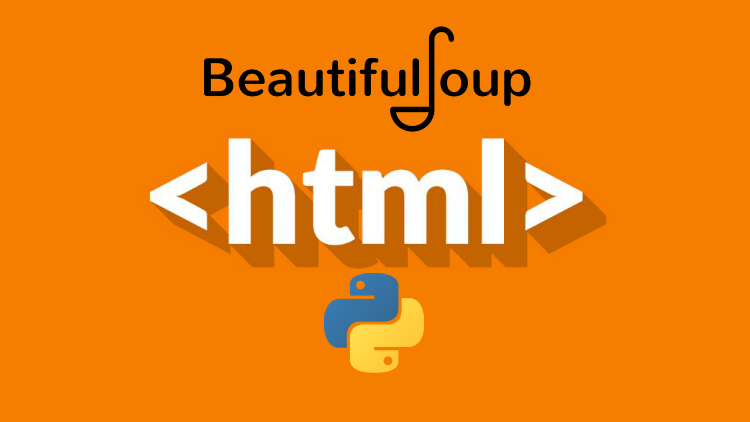
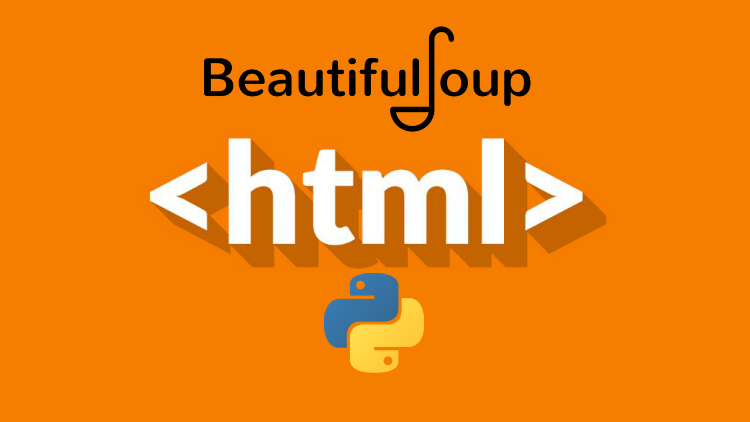

## Немного о парсинге

Веб-парсинг — это процесс извлечения данных из веб-страниц. В контексте данного задания мы будем использовать два популярных инструмента для парсинга данных с HTML-страниц: **BeautifulSoup4** и **requests**. Эти инструменты позволят нам автоматически извлекать информацию, такую как описания курсов, FAQ, заголовки и другие данные, которые размещены на веб-страницах.

#### 1. **Библиотека `requests`**:
**`requests`** — это популярная библиотека для выполнения HTTP-запросов. С помощью этой библиотеки мы можем отправлять запросы на веб-страницы и получать их содержимое.

- **Основные функции:**
  - **GET-запрос:** Позволяет запросить данные с веб-страницы.
  - **POST-запрос:** Используется для отправки данных на сервер (например, форма ввода).
  - **Ответ:** В ответ на запрос мы получаем объект с атрибутами, такими как:
    - **`response.status_code`** — статус ответа от сервера (например, 200 — успешный запрос, 404 — страница не найдена).
    - **`response.text`** — HTML-контент страницы, который мы будем парсить.

#### 2. **Библиотека `BeautifulSoup4`**:
**`BeautifulSoup4`** — это мощная библиотека для парсинга и обработки HTML и XML данных. Она позволяет легко извлекать элементы из HTML-документа, такие как теги, классы, атрибуты и текст.

- **Основные функции:**
  - **`BeautifulSoup()`**: Создает объект `BeautifulSoup`, который позволяет работать с HTML-документом.
  - **`find()`**: Находит первый элемент, соответствующий указанным критериям (например, тег с определенным классом).
  - **`find_all()`**: Находит все элементы, соответствующие критериям.
  - **`text`**: Извлекает текст из найденного элемента.

#### 3. **Основные шаги парсинга данных с использованием BeautifulSoup и requests**:

1. **Отправка HTTP-запроса:**
   С помощью библиотеки `requests` отправляем GET-запрос на веб-страницу. Это позволяет нам получить HTML-код страницы.
   
2. **Парсинг HTML-контента:**
   После того как мы получили HTML-страницу, передаем её в BeautifulSoup для создания объекта, с которым можно удобно работать.

3. **Извлечение данных:**
   Используя методы `find()` или `find_all()`, можно извлекать необходимые элементы (теги) из HTML. Мы можем искать по тегам, классам, атрибутам и другим параметрам.

4. **Обработка данных:**
   После извлечения нужных элементов мы можем очистить их от лишних пробелов, спецсимволов, получить текст и сохранить его для дальнейшего использования.

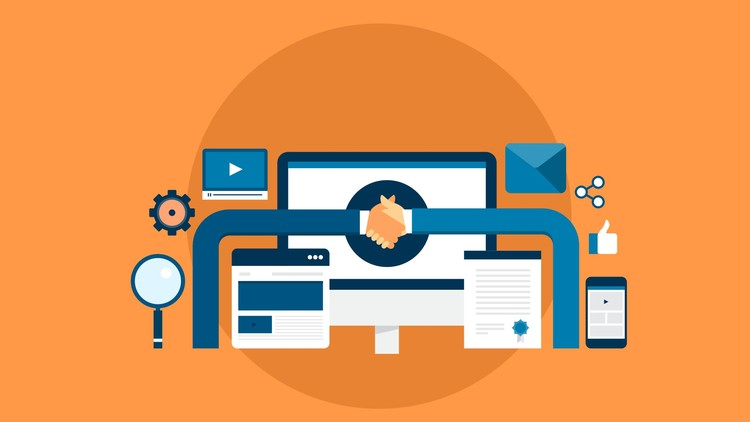
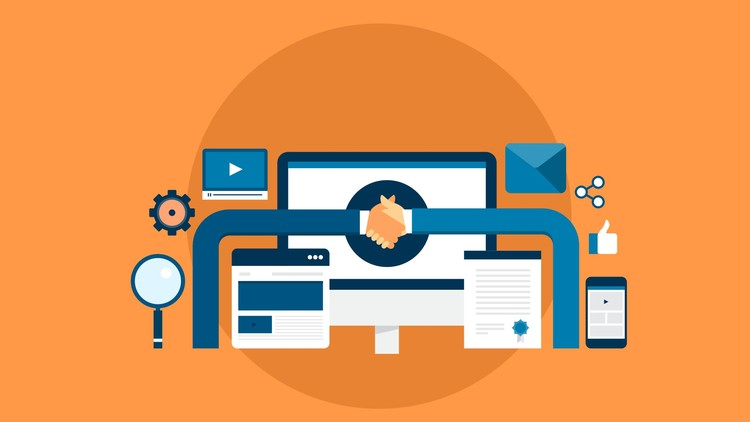

## Что будем парсить: 

* Во-первых, нам нужна общая информация о курсе (она лежит под тегом `tn-atom`), она влючает в себя информацию: о преподавателях, об оплате, программе и карьерном сопровождении. 

* Во-вторых, мы будем парсить информацию о часто спрашиваемых вопросах и ответов на них (FAQ) - это поможет модель лучше понять детали курса.

## Как выполнять задание

Настоятельно рекумендуем все шаги (кроме визуализации в **Streamlit**) делать в одном Jupyter-ноутбуке (либо же в Google Colab, Kaggle Notebook).

Ниже приведена функция для парсинга ссылок на вакансии в качестве примера.

```python
import requests
from bs4 import BeautifulSoup
from typing import List, Dict, Tuple, Set


def fetch_course_urls(url: str) -> Set[str]:
    """
    Загружает страницу по заданному URL, извлекает все ссылки с классом 't978__innermenu-link'
    и возвращает множество уникальных URL-адресов, исключая 'https://karpov.courses/dev/qa'.

    Параметры:
    - url (str): URL страницы, с которой необходимо извлечь ссылки.

    Возвращаемое значение:
    - urls (Set[str]): Множество уникальных URL-адресов.
    """
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        links = soup.find_all("a", class_="t978__innermenu-link")
        urls = {link['href'] for link in links if link.get('href')}

        # Удаляем ненужный URL несуществующего курса
        urls.remove('https://karpov.courses/dev/qa')
        
        return urls
    else:
        print(f"Ошибка при загрузке страницы: {response.status_code}")
        return set()


url = "https://karpov.courses"

urls = fetch_course_urls(url)
for link in urls:
    print('Найдена ссылка на курс:', link)
```

### Задание 1 - Парсинг названий курса

Напишите функцию `parse_titles()`, которая будет:

1. Извлекать название курса с каждой страницы.

### Задание 2 - Парсинг FAQ

Напишите функцию `parse_faq()`, которая будет:

1. Парсить раздел FAQ, если он присутствует на странице, и сохранять вопросы и ответы.
2. В случае отсутствия FAQ в разделе, вывести сообщение об ошибке и пропустить курс.
    
### Задание 3 - Парсинг общей информации о курсе

Напишите функцию `parse_info()`, которая будет:

1. Извлекать общую информацию о курсе (например, описание курса, программа, преподаватели и так далее).
2. Собирать эту информацию в список, очищая текст от лишних символов (например, неразрывных пробелов и других символов).
   
Технические требования:
* Использовать библиотеки requests, BeautifulSoup и re для парсинга.
* Информацию о названиях курсов сложить в список courses_titles.
* Сохранить результаты в словари faq_collection (для вопросов и ответов) и info_collection (для общей информации о курсе).

**Примечание:**

По возможности спарсите всю информацию в автоматическом режиме, стараясь не прибегать к ручной подгонке.

---

### Что проверяется:
- Правильность работы функций `parse_titles()`, `parse_faq()` и `parse_info()`.

### Как сдавать задание:

- Заранее определить импорты нужных библиотек (например, для парсинга)
- Загрузить скрипты со всеми функциями с таким же именами (можно посмотреть шаблон функции) и дождаться проверки

## Практическая часть

## Часть 1: Парсинг названий курса

### Решение студента

In [ ]:
def parse_titles(urls: List[str]) -> List[str]:
    """
    Парсит названия курса с заданных URL.

    Параметры:
    - urls (List[str]): Список URL-адресов для парсинга.

    Возвращаемое значение:
    - courses_titles (List[str]): Список названий курсов, извлеченных с сайтов.
    """
    courses_titles = []

    for url in urls:
        response = requests.get(url)
        if response.status_code != 200:
            print(f"Ошибка при загрузке страницы: {response.status_code}")
            continue

        soup = BeautifulSoup(response.text, 'html.parser')

        course_title = soup.find('__________', class_="__________")
        course_title = re.split(r'__________', course_title.text)[0].strip().replace('___', ' ').replace('___', '')
        courses_titles.append(course_title)

        print(f'Найдена вакансия "{course_title}" с сайта: {url}')

    return sorted(courses_titles)

### Эталонное решение

In [1]:
import requests
from bs4 import BeautifulSoup
from typing import List, Dict, Tuple, Set


def parse_titles(urls: List[str]) -> List[str]:
    """
    Парсит названия курса с заданных URL.

    Параметры:
    - urls (List[str]): Список URL-адресов для парсинга.

    Возвращаемое значение:
    - courses_titles (List[str]): Список названий курсов, извлеченных с сайтов.
    """
    courses_titles = []

    for url in urls:
        response = requests.get(url)
        if response.status_code != 200:
            print(f"Ошибка при загрузке страницы: {response.status_code}")
            continue

        soup = BeautifulSoup(response.text, 'html.parser')

        course_title = soup.find('h1', class_="tn-atom")
        course_title = re.split(r'\=|\||\.', course_title.text)[0].strip().replace('\xa0', ' ').replace(':', '')
        courses_titles.append(course_title)

        print(f'Найдена вакансия "{course_title}" с сайта: {url}')

    return courses_titles

courses_titles = parse_titles(urls)

## Часть 2: Парсинг FAQ

### Решение студента

In [ ]:
import re


def parse_faq(urls: List[str]) -> Tuple[Dict[str, List[str]], List[str]]:
    """
    Парсит информацию о FAQ курсов с заданных URL.

    Если FAQ отсутствует, выводится соответствующее сообщение. Также добавляется обработка случая, когда необходимо "показать еще" для загрузки полного FAQ.

    Параметры:
    - urls (List[str]): Список URL-адресов для парсинга.

    Возвращаемое значение:
    - faq_collection (Dict[str, List[str]]): Словарь, где ключ — URL, а значение — список вопросов и ответов.
    """
    faq_collection = {}

    for url in urls:
        response = requests.get(url)
        if response.status_code != 200:
            print(f"Ошибка при загрузке страницы: {response.status_code}")
            continue

        soup = BeautifulSoup(response.text, '__________')  # Заполните пропуск: какой парсер использовать?

        # Проверяем наличие FAQ
        if not any(elem.text.startswith('__________') for elem in soup.find_all('__________', class_='__________')):  # Заполните все пропуски
            print(f'FAQ с {url} не был загружен по причине его отсутствия!')
            continue

        # Получаем элементы FAQ
        elements_descr = soup.find_all('div', class_='__________')  # Какой класс для контейнера FAQ?
        if any(elem.text.strip() == '__________' for elem in soup.find_all('button', type='__________')):  # Какой тип кнопки для "Показать еще"?
            elements_descr = elements_descr[-2:]  # Какую часть FAQ оставить?
        else:
            elements_descr = elements_descr[-1:]

        # Извлекаем вопросы и ответы
        result = re.split(r'\s{2,}', ''.join(e.text for e in elements_descr).replace('__________', ' '))[1:-1]  # Какое регулярное выражение применить?
        questions_answers = [f'Вопрос: {result[i]}\nОтвет: {result[i + 1]}' for i in range(0, len(result), 2)]

        faq_collection[url] = questions_answers
        print(f'FAQ с {url} загружен успешно!')

    return faq_collection

### Эталонное решение

In [ ]:
import re


def parse_faq(urls: List[str]) -> Dict[str, List[str]]
    """
    Парсит информацию о FAQ курсов с заданных URL.

    Если FAQ отсутствует, выводится соответствующее сообщение. Также добавляется обработка случая, когда необходимо "показать еще" для загрузки полного FAQ.

    Параметры:
    - urls (List[str]): Список URL-адресов для парсинга.

    Возвращаемое значение:
    - faq_collection (Dict[str, List[str]]): Словарь, где ключ — URL, а значение — список вопросов и ответов.
    """
    faq_collection = {}

    for url in urls:
        response = requests.get(url)
        if response.status_code != 200:
            print(f"Ошибка при загрузке страницы: {response.status_code}")
            continue

        soup = BeautifulSoup(response.text, 'html.parser')

        # Проверяем наличие FAQ
        if not any(elem.text.startswith('FAQ') for elem in soup.find_all('h2', class_='tn-atom')):
            print(f'FAQ с {url} не был загружен по причине его отсутствия!')
            continue

        # Получаем элементы FAQ
        elements_descr = soup.find_all('div', class_='t849')
        if any(elem.text.strip() == 'Показать еще' for elem in soup.find_all('button', type='button')):
            elements_descr = elements_descr[-2:]
        else:
            elements_descr = elements_descr[-1:]

        # Извлекаем вопросы и ответы
        result = re.split(r'\s{2,}', ''.join(e.text for e in elements_descr).replace('\xa0', ' '))[1:-1]
        questions_answers = [f'Вопрос: {result[i]}\nОтвет: {result[i + 1]}' for i in range(0, len(result), 2)]

        faq_collection[url] = questions_answers
        print(f'FAQ с {url} загружен успешно!')

    return faq_collection

faq_collection = parse_faq(urls)

## Часть 3: Парсинг общей информации о курсе

### Решение студента

In [ ]:
def parse_information(urls: List[str]) -> Dict[str, List[str]]:
    """
    Парсит информацию о курсах с заданных URL. Извлекает текстовые блоки с информацией о курсе,
    удаляя лишние символы и форматируя текст в абзацы.

    Параметры:
    - urls (List[str]): Список URL-адресов для парсинга.

    Возвращаемое значение:
    - courses_information (Dict[str, List[str]]): Словарь, где ключ — URL, а значение — список текстовых блоков с информацией о курсе.
    """
    info_collection = {}

    for url in urls:
        response = requests.get(url)
        if response.status_code != 200:
            print(f'Ошибка при загрузке страницы {url}')
            continue

        soup = BeautifulSoup(response.text, 'html.parser')
        result = soup.find_all('div', class_='__________', field=re.compile('__________'))

        sequence, ready_res = '', []
        for elem in result:
            text = elem.text.strip()
            if text:
                sequence += text.translate({160: ' ', 65279: ' ', 10145: ' '}).replace('\u2009', '').replace('1. 2. 3. 4. 5.', '') + ' '
            else:
                ready_res.append(sequence)
                sequence = ''

        info_collection[url] = [res.strip() for res in ready_res if len(res) > 250]

        # если вышло, что у нас всего один абзац, и ничего не добавилось в информацию о курсе
        if not info_collection[url]:
            info_collection[url] = [sequence]

        print(f'Информация с {url} загружена успешно.')

    return info_collection


info_collection = parse_information(urls)

### Эталонное решение

In [ ]:
def parse_information(urls: List[str]) -> Dict[str, List[str]]:
    """
    Парсит информацию о курсах с заданных URL. Извлекает текстовые блоки с информацией о курсе,
    удаляя лишние символы и форматируя текст в абзацы.

    Параметры:
    - urls (List[str]): Список URL-адресов для парсинга.

    Возвращаемое значение:
    - courses_information (Dict[str, List[str]]): Словарь, где ключ — URL, а значение — список текстовых блоков с информацией о курсе.

    Пример:
    >>> urls = ["http://example.com/course1", "http://example.com/course2"]
    >>> courses_information = parse_courses_information(urls)
    >>> print(courses_information)
    """
    info_collection = {}

    for url in urls:
        response = requests.get(url)
        if response.status_code != 200:
            print(f'Ошибка при загрузке страницы {url}')
            continue

        soup = BeautifulSoup(response.text, 'html.parser')
        result = soup.find_all('div', class_='tn-atom', field=re.compile('tn_text_\d+'))

        sequence, ready_res = '', []
        for elem in result:
            text = elem.text.strip()
            if text:
                sequence += text.translate({160: ' ', 65279: ' ', 10145: ' '}).replace('\u2009', '').replace('1. 2. 3. 4. 5.', '') + ' '
            else:
                ready_res.append(sequence)
                sequence = ''

        info_collection[url] = [res.strip() for res in ready_res if len(res) > 250]

        # если вышло, что у нас всего один абзац, и ничего не добавилось в информацию о курсе
        if not info_collection[url]:
            info_collection[url] = [sequence]

        print(f'Информация с {url} загружена успешно.')

    return info_collection